# Introduction
In this project, the objective is to analyze the political families of Europe, focusing on the following groups: the Left, Socialists & Democrats (S&D), the Greens, Renew Europe, the European People's Party (EPP), the European Conservatives and Reformists (ECR) and Identity and Democracy (ID). This analysis aims to uncover meaningful insights about the priorities, sentiment, and thematic focuses of these political entities through various data mining techniques.

The analysis will encompass several key techniques: data cleaning and preprocessing to ensure normalized and noise-free text data; TF-IDF to identify the most frequently used terms and visualize them with word clouds; the development of a language model to provide unbiased information about political programs; n-grams analysis to find common phrases within topics such as the economy, climate change, education, healthcare, and immigration; information retrieval using Cosine Similarity, BM25, and Latent Semantic Indexing (LSI) to match queries with party platforms; sentiment analysis to gauge the overall sentiment of each political family; and various data visualization methods to clearly present the findings.

# Tool and library installations



In [5]:
!pip install nltk scikit-learn wordcloud matplotlib PyPDF2 pandas
!pip install rank-bm25 --quiet
!pip install gensim --quiet


# File processing and cleaning
First, let's read the text data from files corresponding to different political families, convert the text to lowercase to ensure uniformity, remove punctuation to eliminate noise, and filter out common stop words. The result is a clean, normalized text dataset that is ready for further analysis, such as identifying significant terms and generating visualizations.

## Imports


In [6]:
import os
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
import PyPDF2
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Cleaning

The cleaning process involves several steps to ensure the text data is consistent and free from noise.

###Stop words
 First, the text is converted to lowercase to ensure uniformity, so words like "Economy" and "economy" are treated as the same word. Next, punctuation, numbers, and special characters are removed to focus solely on meaningful words. Finally, stop words, which are commonly used words that do not carry significant meaning (e.g., "and", "the", "is"), or even "europe", "european", etc. are removed to emphasize the more important terms in the text.

###Lemmatization

 Lemmatization is the process of converting a word to its base or dictionary form, known as the lemma. The goal is to reduce different forms of a word to a common base form, which helps in standardizing the text data. Unlike stemming, which often just truncates the ends of words, lemmatization uses linguistic knowledge about the word's meaning and context to accurately return its base form.

In [7]:
# Function for data cleaning
def preprocess_text(text):
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))

    # Add custom stop words
    custom_stop_words = {
        'european', 'europe', 'eu', 'europes', 'must', 'epp', 'want',
        'people', 'rights', 'government', 'country', 'party', 'policies',
        'political', 'new', 'one', 'two', 'state', 'states', 'make',
        'policy', 'public', 'society', 'social', 'system', 'national',
        'world', 'many', 'also', 'well', 'parties', 'member', 'members',
        'including', 'within', 'work', 'years','balkan', 'seas',
        'need', 'manifesto', 'id', 'aalbers', 'pu', 'inthe', 'theeuropean',
        'epp', 'ecr', 'sd', 'called', 'conference', 'union', 'ecpm','alde',
        'edp', 'shall', 'balkan', 'fir','salvin', 'von', 'fur', 'lega',
        'suport', 'time', 'country', 'continent', 'theeuropean',
        'western', 'support', 'germany', 'paper', 'efa', 'fir', 'ple', 'global',
        'balkan', 'sea', 'three', 'si', 'page', 'delegation', 'mep',
        'italian', 'report', 'head', 'country','would'
    }
    stop_words.update(custom_stop_words)

    # Tokenize, remove stop words, and lemmatize
    words = nltk.word_tokenize(text)
    cleaned_text = ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])

    return cleaned_text

## Reading the files
The load_and_clean_data_from_pdf function reads text from PDF files and cleans the data. First, it opens the PDF file and uses the PyPDF2 library to extract text from each page. Then, the extracted text is passed through the cleaning process, which converts it to lowercase, removes punctuation, numbers, and special characters, and eliminates stop words. The result is a clean and normalized text dataset ready for further analysis.

In [8]:
# Function to load and clean data from PDF files
def load_and_clean_data_from_pdf(file_path):
    text = ""
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text += page.extract_text()
    cleaned_text = preprocess_text(text)
    return text, cleaned_text

# Load and clean data for each political family
pdf_files = ["left.pdf", "sd.pdf", "greens.pdf", "renew.pdf",
             "epp.pdf", "ecr.pdf", 'id.pdf']
family_names = ["Left", "S&D", "Greens", "Renew Europe", "EPP", "ECR", 'ID']
documents = [load_and_clean_data_from_pdf(file) for file in pdf_files]


Printing the result


In [9]:
# Function to get the first seven lines
def get_first_seven_lines(text):
    lines = text.split('\n')
    return '\n'.join(lines[:7])

# Visualize the first seven lines before and after cleaning
for i, (before_cleaning, after_cleaning) in enumerate(documents):
    before = get_first_seven_lines(before_cleaning)
    after = get_first_seven_lines(after_cleaning)

    print(f"{family_names[i]} - Before Cleaning:\n{before}\n")
    print(f"{family_names[i]} - After Cleaning:\n{after}\n")


Left - Before Cleaning:
1
EUROPEAN ELECTIONS 
MANIFESTO 2024 2Principles and Proposals 
of the European Left  
The upcoming elections to the European Parliament will take place under extraordinary circumstances. 
Europe has become the fastest warming continent in the world and the phase-out of fossil fuels must 
be accelerated. Many European citizens are struggling with a cost-of-living crisis while billions of euros 

Left - After Cleaning:
election principle proposal left upcoming election parliament take place extraordinary circumstance become fastest warming phaseout fossil fuel accelerated citizen struggling costofliving crisis billion euro spent unprecedented military buildup return failed neoliberal austerity even horizon finally election overshadowed war taking place soil near vicinity election therefore secondorder election voice heard call democratic citizen form majority participate vote election democratic peaceful ecological extreme nationalist neofascist right already gov

Print it nicely.

In [10]:
from IPython.display import display, HTML

text = """
Left - Before Cleaning:
1
EUROPEAN ELECTIONS MANIFESTO 2024
2
Principles and Proposals of the European Left
The upcoming elections to the European Parliament will take place under extraordinary circumstances.
Europe has become the fastest warming continent in the world and the phase-out of fossil fuels must be accelerated.
Many European citizens are struggling with a cost-of-living crisis while billions of euros

Left - After Cleaning:
election principle proposal left upcoming election parliament take place extraordinary circumstance become fastest warming continent phaseout fossil fuel
 accelerated citizen struggling costofliving crisis billion euro
"""

html_code = f"""
<div style="
    font-family: 'Arial, sans-serif';
    font-size: 16px;
    color: #333;
    background-color: #f9f9f9;
    border: 1px solid #ddd;
    border-radius: 10px;
    padding: 20px;
    line-height: 1.6;
    max-width: 2000px;
    margin: 20px auto;
">
    <pre>{text}</pre>
</div>
"""

# Display the styled text
display(HTML(html_code))


# TF-IDF
TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Here's a breakdown of the components and why it's useful:

##Term Frequency (TF)
The term frequency is the number of times a term appears in a document. However, since documents can vary in length, a term might appear much more frequently in long documents than shorter ones. Thus, the term frequency is often normalized (e.g., divided by the total number of terms in the document) to prevent a bias towards longer documents.

##Inverse Document Frequency (IDF)
The inverse document frequency is a measure of how much information the word provides, i.e., whether the term is common or rare across all documents. It is calculated as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears. Words that occur in many documents have a low IDF, while rare words have a high IDF.



##TF-IDF Calculation



The TF-IDF score is calculated by multiplying the term frequency and the inverse document frequency:


    TF-IDF(t,d)=TF(t,d)×IDF(t)

##TF-IDF matrix

We use a TF-IDF vectorizer to analyze the importance of words in documents from different political families, converting the text into a matrix of TF-IDF features, where each value represents the significance of a word in a document. The resulting matrix is then turned into a pandas DataFrame, making it easy to see which words are most important for each political family based on their TF-IDF scores.

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract only cleaned texts for TF-IDF processing
cleaned_documents = [after_cleaning for _, after_cleaning in documents]

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(cleaned_documents)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a pandas DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=family_names, columns=feature_names)


## Most common words

Printing the top 10 most important words from each family, based on their tf-idf score.


In [12]:
# Function to print top 10 TF-IDF scores for each family
def print_top_tfidf_scores(tfidf_df, family_names):
    for family in family_names:
        print(f"\nTop 10 TF-IDF scores for {family}:")
        top_10 = tfidf_df.loc[family].nlargest(10)
        print(top_10)

# Print the top 10 TF-IDF scores for each political family
print_top_tfidf_scores(tfidf_df, family_names)



Top 10 TF-IDF scores for Left:
housing             0.741178
financialization    0.272360
estate              0.158627
market              0.149991
capitalism          0.132916
mortgage            0.113733
crisis              0.102847
financial           0.100942
price               0.095255
private             0.090990
Name: Left, dtype: float64

Top 10 TF-IDF scores for S&D:
woman        0.530213
gender       0.499303
equality     0.195771
strategic    0.128883
violence     0.114200
autonomy     0.094623
ensure       0.088097
open         0.084915
equal        0.084834
group        0.083203
Name: S&D, dtype: float64

Top 10 TF-IDF scores for Greens:
green         0.224429
courage       0.188629
climate       0.172039
right         0.150076
need          0.137265
human         0.131774
energy        0.129944
fir           0.115587
transition    0.109812
region        0.106151
Name: Greens, dtype: float64

Top 10 TF-IDF scores for Renew Europe:
digital        0.197226
market         0.

Also, print the most important words as wordclouds.
It is easier to see the priorities of each family this way.


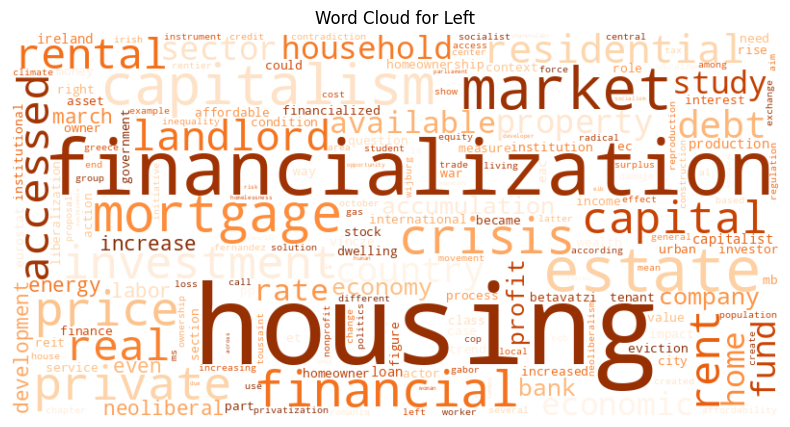

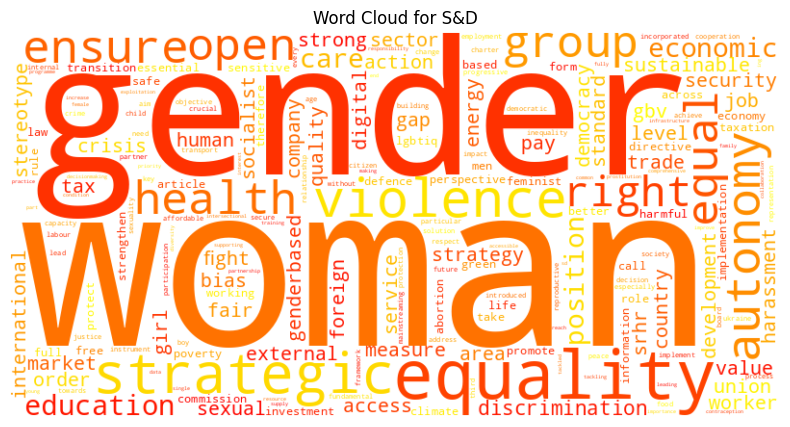

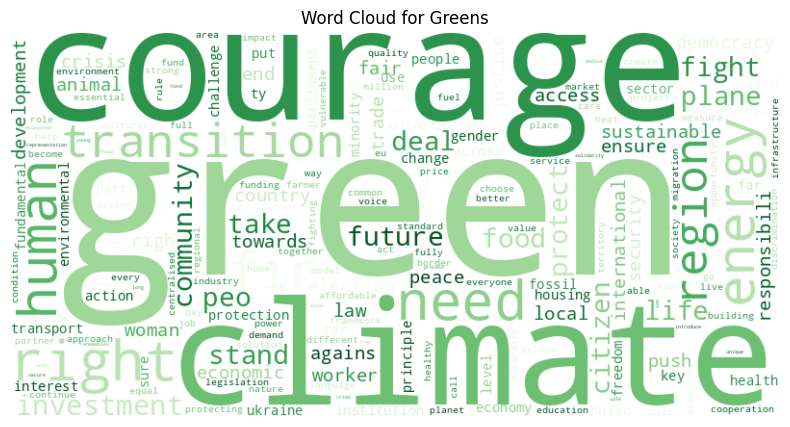

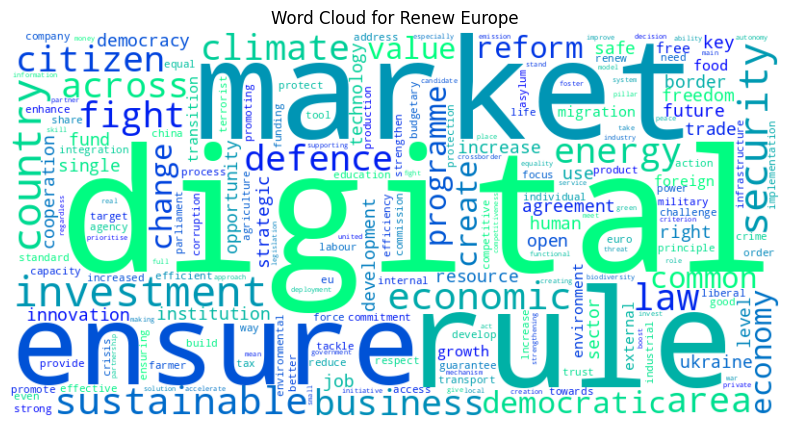

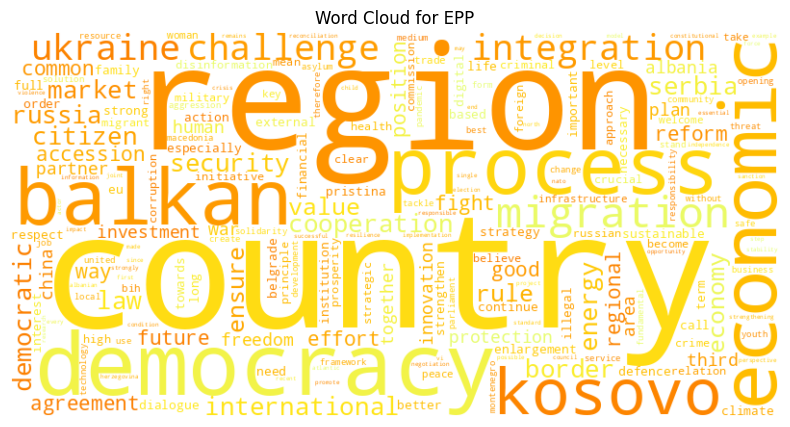

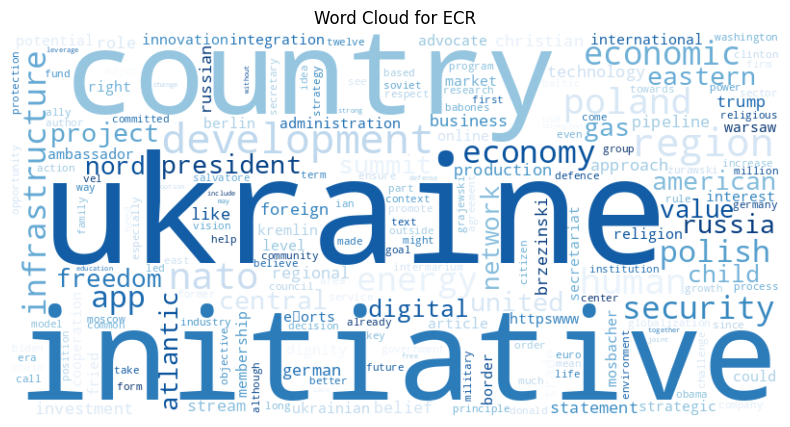

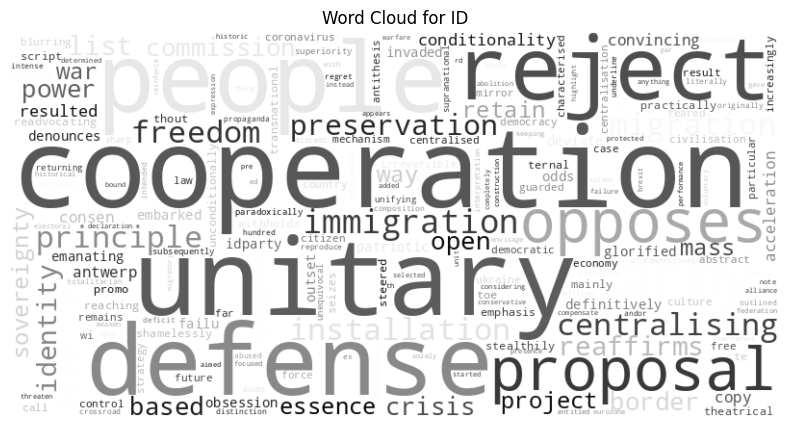

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define colormap for each family
colormaps = {
    "Left": "Oranges",
    "S&D": "autumn",
    "Greens": "Greens",
    "Renew Europe": "winter",
    "EPP": "Wistia",
    "ECR": "Blues_r",
    "ID": "gray"
}

def generate_wordcloud(tfidf_df, family_names):
    for family_name in family_names:
      if family_name in colormaps:
          colormap = colormaps[family_name]
          word_freq = tfidf_df.loc[family_name].to_dict()
          # Generate word cloud
          wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate_from_frequencies(word_freq)

          # Display the word cloud
          plt.figure(figsize=(10, 5))
          plt.imshow(wordcloud, interpolation='bilinear')
          plt.axis('off')
          plt.title(f"Word Cloud for {family_name}")
          plt.show()

          # Add a line break between word clouds
          print("\n" + "="*80 + "\n")

# Generate word clouds for each political family
generate_wordcloud(tfidf_df, family_names)




# N-grams

N-grams are contiguous sequences of n items from a given text, where the items are typically words. For example, a bigram is a sequence of two consecutive words.

 In our analysis, we process a collection of PDF documents to identify and visualize the most frequent bigrams that end with a specified word. We achieve this by loading and cleaning the text from the PDFs, generating bigrams, and then filtering and counting those that end with our chosen word. Finally, we visualize the top bigrams using pie charts to understand their prevalence in the documents.

##Bigrams generation
This code tokenizes the input text into individual words and generates bigrams, which are sequences of two consecutive words. It then converts these bigrams into strings by joining the two words with a space and returns the list of bigram strings.




In [14]:
# Function to generate bigrams
def generate_bigrams(text):
    words = nltk.word_tokenize(text)
    bigrams = list(nltk.bigrams(words))
    bigram_strings = [' '.join(bigram) for bigram in bigrams]
    return bigram_strings


##Fixed word n-grams

Using find_bigrams_with_fixed_word, we are filtering a list of bigrams to find those that end with a specified word. It then counts the occurrences of these filtered bigrams using the Counter class from the collections module and returns the counts.

In [15]:
from collections import Counter

# Function to find bigrams that end with a fixed word
def find_bigrams_with_fixed_word(bigrams, word):
    filtered_bigrams = [bigram for bigram in bigrams if bigram.split()[1] == word]
    bigram_counts = Counter(filtered_bigrams)
    return bigram_counts


##Most common N-grams

The function plot_bigram_counts takes the counts of these bigrams, prepares the data by identifying the top six bigrams and grouping the rest as 'others', and then plots this information as a pie chart.

 The main loop processes each document, generates bigrams, finds those ending with the chosen word, and displays the top six bigrams and their frequencies both as text output and pie charts.


Top 6 Bigrams Ending with 'health' in left.pdf:
effect health: 2
cover health: 1
access health: 1
strengthening health: 1
strengthen health: 1
care health: 1
others: 12


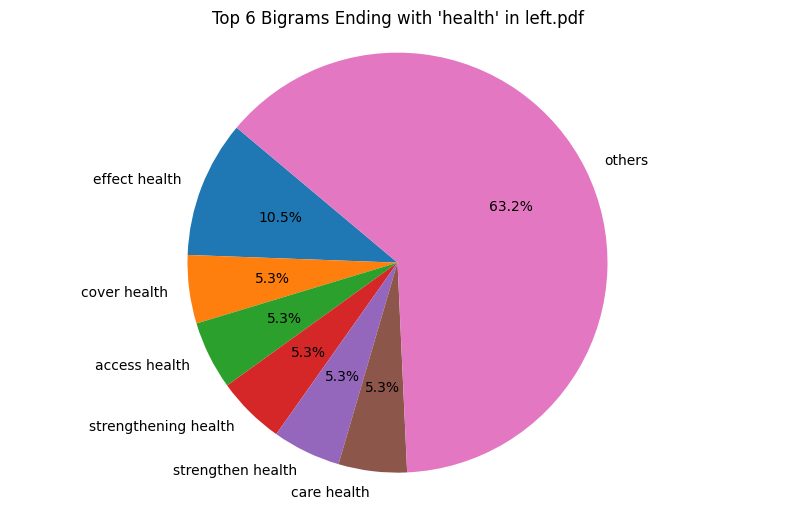


Top 6 Bigrams Ending with 'health' in sd.pdf:
reproductive health: 13
woman health: 3
mental health: 2
maternal health: 2
defends health: 1
access health: 1
others: 29


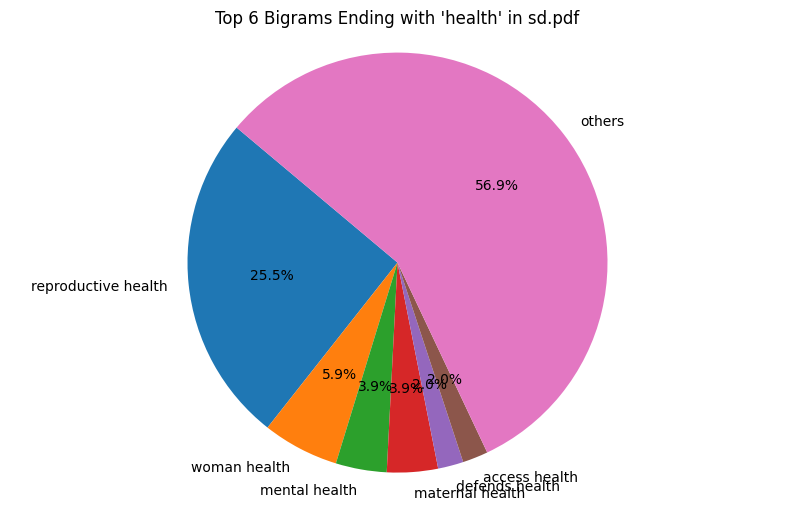


Top 6 Bigrams Ending with 'health' in greens.pdf:
mental health: 4
universal health: 3
zeropollution health: 2
human health: 2
physical health: 2
meet health: 1
others: 17


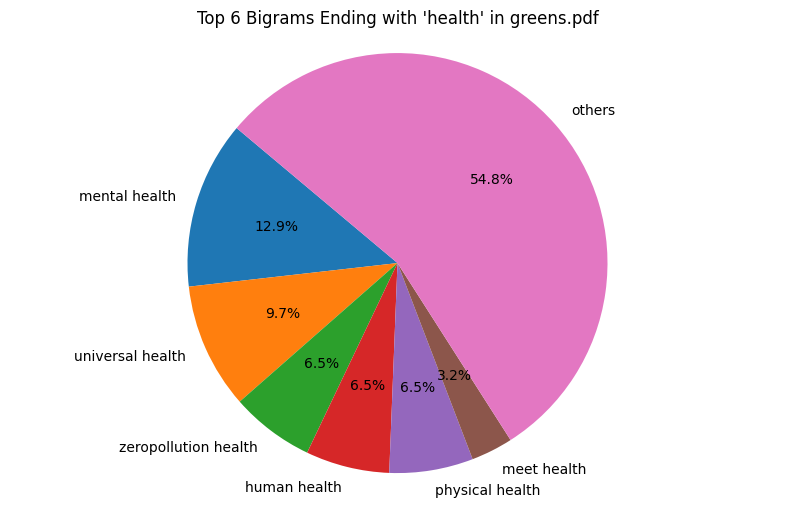


Top 6 Bigrams Ending with 'health' in renew.pdf:
reproductive health: 3
climate health: 2
menstrual health: 2


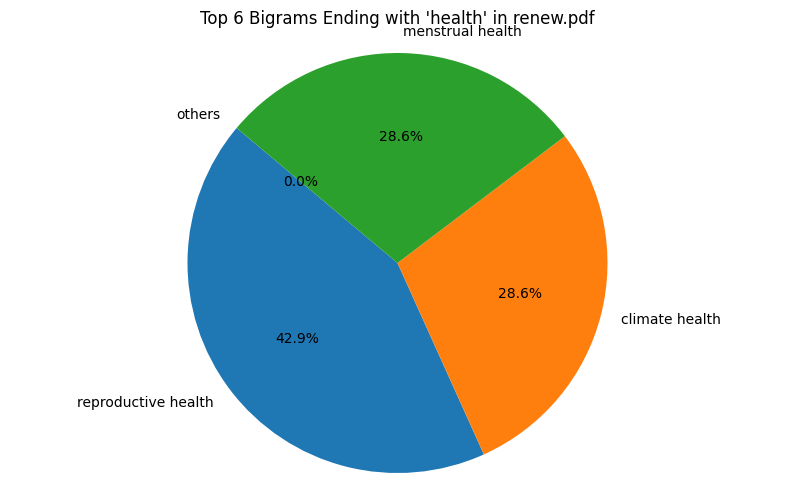


Top 6 Bigrams Ending with 'health' in epp.pdf:
physical health: 2
mental health: 2
invests health: 1
high health: 1
safety health: 1
treatment health: 1
others: 14


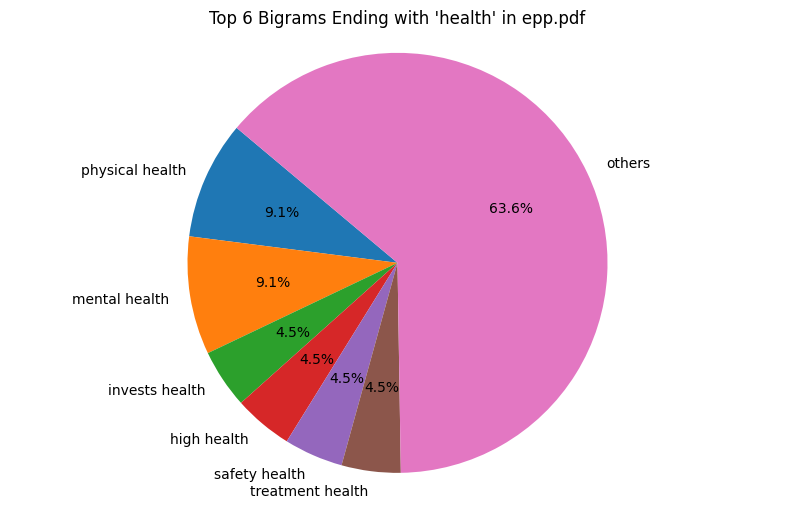


Top 6 Bigrams Ending with 'health' in ecr.pdf:
mental health: 2
immense health: 1
economic health: 1


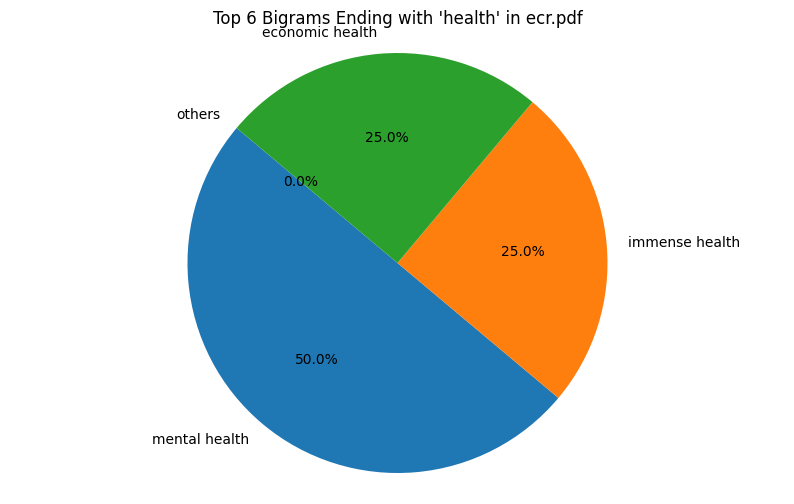

In [16]:
# Plot top 6 bigram counts
def plot_bigram_counts(bigram_counts, document_name, chosen_word):
    # Prepare data
    top_6 = bigram_counts[:6]
    others_count = sum([count for _, count in bigram_counts[6:]])

    labels = [bigram for bigram, count in top_6] + ['others']
    sizes = [count for _, count in top_6] + [others_count]

    # Plot pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f"Top 6 Bigrams Ending with '{chosen_word}' in {document_name}")
    plt.show()

# Chosen word to search in bigrams
chosen_word = "health"

# Find and display top 6 bigrams ending with the chosen word for each document
for index, (original_text, cleaned_text) in enumerate(documents):
    bigrams = generate_bigrams(cleaned_text)
    top_bigrams = find_bigrams_with_fixed_word(bigrams, chosen_word).most_common()

    if top_bigrams:
        print(f"\nTop 6 Bigrams Ending with '{chosen_word}' in {pdf_files[index]}:")
        for bigram, count in top_bigrams[:6]:
            print(f"{bigram}: {count}")
        if len(top_bigrams) > 6:
            others_count = sum([count for _, count in top_bigrams[6:]])
            print(f"others: {others_count}")

        # Plot the bigram counts as a pie chart
        plot_bigram_counts(top_bigrams, pdf_files[index], chosen_word)


# Language model
A language model is a statistical model that can be used to estimate the probability of a sequence of words in a language. It is trained on a corpus of text data, and learns to predict the likelihood of observing a given sequence of words based on the frequency and context of those words in the training data.

Language models can be used for a variety of natural language processing tasks, such as text generation, machine translation, speech recognition, and more.

In our case, we will use a LM to generate us sentences based on each input family.

##Imports

Importing necessary libraries and downloading data.




In [17]:
import nltk
from nltk.corpus import brown
from nltk import trigrams, bigrams
from collections import defaultdict, Counter
import re
import PyPDF2

# Download necessary NLTK data
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

The input for our language model will consist in the 7 manifests that we used before, but in this case the text will not be cleaned. This is because we need all words(including stop words) in natural speaking.

In [18]:
# Function for data cleaning
def preprocess_text_notcleaned(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

# Function to load and clean data from PDF files
def load_and_not_clean_data_from_pdf(file_path):
    text = ""
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text += page.extract_text()
    cleaned_text = preprocess_text_notcleaned(text)
    return cleaned_text


# Load and clean data for each political family
pdf_files = ["left.pdf", "sd.pdf", "greens.pdf", "renew.pdf",
             "epp.pdf", "ecr.pdf", 'id.pdf']
family_names = ["Left", "S&D", "Greens", "Renew Europe", "EPP", "ECR", 'ID']

documents_not_cleaned = [load_and_not_clean_data_from_pdf(file) for file in pdf_files]


##Corpus Building

So as stated before, in this case, our corpus will be the specific document for our specific family - in our case 0: Left, 1: SD, 2: Greens, 3: Renew Europe, 4: EPP, 5: ECR and 6: ID.

In [19]:

#Left
combined_text_0 = documents_not_cleaned[0]
corpus_0 = combined_text_0.split()
#SD
combined_text_1 = documents_not_cleaned[1]
corpus_1 = combined_text_1.split()
#Green
combined_text_2 = documents_not_cleaned[2]
corpus_2 = combined_text_2.split()
#Renew
combined_text_3 = documents_not_cleaned[3]
corpus_3 = combined_text_0.split()
#EPP
combined_text_4 = documents_not_cleaned[4]
corpus_4 = combined_text_4.split()
#ECR
combined_text_5 = documents_not_cleaned[5]
corpus_5 = combined_text_0.split()
#ID
combined_text_6 = documents_not_cleaned[6]
corpus_6 = combined_text_6.split()

###Bigrams construction

First, we create the bigrams, which are pairs of consecutive words from the corpus. Then, we calculate the frequency of each bigram, indicating how often each word pair appears. Additionally, we compute unigram frequencies to determine how often each individual word appears in the corpus.

In [20]:

#Left
bigrams_list_0 = list(bigrams(documents_not_cleaned[0].split()))
bigram_freq_0 = Counter(bigrams_list_0)
unigram_freq_0 = defaultdict(int)
for (w1, w2) in bigrams_list_0:
    unigram_freq_0[w1] += 1
unigram_freq_0[w2] += 1

#SD
bigrams_list_1 = list(bigrams(documents_not_cleaned[1].split()))
bigram_freq_1 = Counter(bigrams_list_1)
unigram_freq_1 = defaultdict(int)
for (w1, w2) in bigrams_list_1:
    unigram_freq_1[w1] += 1
unigram_freq_1[w2] += 1

#Green
bigrams_list_2 = list(bigrams(documents_not_cleaned[2].split()))
bigram_freq_2 = Counter(bigrams_list_2)
unigram_freq_2 = defaultdict(int)
for (w1, w2) in bigrams_list_2:
    unigram_freq_2[w1] += 1
unigram_freq_2[w2] += 1

#Renew
bigrams_list_3 = list(bigrams(documents_not_cleaned[3].split()))
bigram_freq_3 = Counter(bigrams_list_3)
unigram_freq_3 = defaultdict(int)
for (w1, w2) in bigrams_list_3:
    unigram_freq_3[w1] += 1
unigram_freq_3[w2] += 1

#EPP
bigrams_list_4 = list(bigrams(documents_not_cleaned[4].split()))
bigram_freq_4 = Counter(bigrams_list_4)
unigram_freq_4 = defaultdict(int)
for (w1, w2) in bigrams_list_4:
    unigram_freq_4[w1] += 1
unigram_freq_4[w2] += 1

#ECR
bigrams_list_5 = list(bigrams(documents_not_cleaned[5].split()))
bigram_freq_5 = Counter(bigrams_list_5)
unigram_freq_5 = defaultdict(int)
for (w1, w2) in bigrams_list_5:
    unigram_freq_5[w1] += 1
unigram_freq_5[w2] += 1

#ID
bigrams_list_6 = list(bigrams(documents_not_cleaned[6].split()))
bigram_freq_6 = Counter(bigrams_list_6)
unigram_freq_6 = defaultdict(int)
for (w1, w2) in bigrams_list_6:
    unigram_freq_6[w1] += 1
unigram_freq_6[w2] += 1

Finally, it calculates the conditional probability of each bigram occurring, which is the frequency of the bigram divided by the frequency of the first word in the bigram. This results in the probability of the second word given the first word, without applying any smoothing techniques.

In [21]:
# Compute bigram probabilities without smoothing
#Left
bigram_prob_0 = {}
for (w1, w2), freq in bigram_freq_0.items():
    bigram_prob_0[(w1, w2)] = freq / unigram_freq_0[w1]

#SD
bigram_prob_1 = {}
for (w1, w2), freq in bigram_freq_1.items():
    bigram_prob_1[(w1, w2)] = freq / unigram_freq_1[w1]

#Green
bigram_prob_2 = {}
for (w1, w2), freq in bigram_freq_2.items():
    bigram_prob_2[(w1, w2)] = freq / unigram_freq_2[w1]

#Renew
bigram_prob_3 = {}
for (w1, w2), freq in bigram_freq_3.items():
    bigram_prob_3[(w1, w2)] = freq / unigram_freq_3[w1]

#EPP
bigram_prob_4 = {}
for (w1, w2), freq in bigram_freq_4.items():
    bigram_prob_4[(w1, w2)] = freq / unigram_freq_4[w1]

#ECR
bigram_prob_5 = {}
for (w1, w2), freq in bigram_freq_5.items():
    bigram_prob_5[(w1, w2)] = freq / unigram_freq_5[w1]

#ID
bigram_prob_6 = {}
for (w1, w2), freq in bigram_freq_6.items():
    bigram_prob_6[(w1, w2)] = freq / unigram_freq_6[w1]

###Trigrams construction

Similar to bigrams. This code processes a text corpus to calculate trigram probabilities. It starts by creating trigrams, which are sequences of three consecutive words from the corpus. It then calculates the frequency of each trigram, indicating how often each sequence of three words appears. Additionally, it computes bigram and unigram frequencies to determine the occurrences of word pairs and individual words, respectively. The context frequencies, which are the frequencies of the first two words in each trigram, are also computed.

In [22]:
# Left
# Create trigrams from the corpus
trigrams_list_0 = list(trigrams(corpus_0))

# Compute trigram frequencies
trigram_freq_0 = Counter(trigrams_list_0)

# Compute bigram and unigram frequencies
bigram_freq_0 = defaultdict(int)
unigram_freq_0 = defaultdict(int)
for (w1, w2, w3) in trigrams_list_0:
    bigram_freq_0[(w1, w2)] += 1
    unigram_freq_0[w1] += 1
    unigram_freq_0[w2] += 1
    unigram_freq_0[w3] += 1

# Compute context frequencies (bigram frequencies)
context_freq_0 = defaultdict(int)
for (w1, w2, w3) in trigrams_list_0:
    context_freq_0[(w1, w2)] += 1

# SD
# Create trigrams from the corpus
trigrams_list_1 = list(trigrams(corpus_1))

# Compute trigram frequencies
trigram_freq_1 = Counter(trigrams_list_1)

# Compute bigram and unigram frequencies
bigram_freq_1 = defaultdict(int)
unigram_freq_1 = defaultdict(int)
for (w1, w2, w3) in trigrams_list_1:
    bigram_freq_1[(w1, w2)] += 1
    unigram_freq_1[w1] += 1
    unigram_freq_1[w2] += 1
    unigram_freq_1[w3] += 1

# Compute context frequencies (bigram frequencies)
context_freq_1 = defaultdict(int)
for (w1, w2, w3) in trigrams_list_1:
    context_freq_1[(w1, w2)] += 1

# Green
# Create trigrams from the corpus
trigrams_list_2 = list(trigrams(corpus_2))

# Compute trigram frequencies
trigram_freq_2 = Counter(trigrams_list_2)

# Compute bigram and unigram frequencies
bigram_freq_2 = defaultdict(int)
unigram_freq_2 = defaultdict(int)
for (w1, w2, w3) in trigrams_list_2:
    bigram_freq_2[(w1, w2)] += 1
    unigram_freq_2[w1] += 1
    unigram_freq_2[w2] += 1
    unigram_freq_2[w3] += 1

# Compute context frequencies (bigram frequencies)
context_freq_2 = defaultdict(int)
for (w1, w2, w3) in trigrams_list_2:
    context_freq_2[(w1, w2)] += 1

# Renew
# Create trigrams from the corpus
trigrams_list_3 = list(trigrams(corpus_3))

# Compute trigram frequencies
trigram_freq_3 = Counter(trigrams_list_3)

# Compute bigram and unigram frequencies
bigram_freq_3 = defaultdict(int)
unigram_freq_3 = defaultdict(int)
for (w1, w2, w3) in trigrams_list_3:
    bigram_freq_3[(w1, w2)] += 1
    unigram_freq_3[w1] += 1
    unigram_freq_3[w2] += 1
    unigram_freq_3[w3] += 1

# Compute context frequencies (bigram frequencies)
context_freq_3 = defaultdict(int)
for (w1, w2, w3) in trigrams_list_3:
    context_freq_3[(w1, w2)] += 1

# EPP
# Create trigrams from the corpus
trigrams_list_4 = list(trigrams(corpus_4))

# Compute trigram frequencies
trigram_freq_4 = Counter(trigrams_list_4)

# Compute bigram and unigram frequencies
bigram_freq_4 = defaultdict(int)
unigram_freq_4 = defaultdict(int)
for (w1, w2, w3) in trigrams_list_4:
    bigram_freq_4[(w1, w2)] += 1
    unigram_freq_4[w1] += 1
    unigram_freq_4[w2] += 1
    unigram_freq_4[w3] += 1

# Compute context frequencies (bigram frequencies)
context_freq_4 = defaultdict(int)
for (w1, w2, w3) in trigrams_list_4:
    context_freq_4[(w1, w2)] += 1

# ECR
# Create trigrams from the corpus
trigrams_list_5 = list(trigrams(corpus_5))

# Compute trigram frequencies
trigram_freq_5 = Counter(trigrams_list_5)

# Compute bigram and unigram frequencies
bigram_freq_5 = defaultdict(int)
unigram_freq_5 = defaultdict(int)
for (w1, w2, w3) in trigrams_list_5:
    bigram_freq_5[(w1, w2)] += 1
    unigram_freq_5[w1] += 1
    unigram_freq_5[w2] += 1
    unigram_freq_5[w3] += 1

# Compute context frequencies (bigram frequencies)
context_freq_5 = defaultdict(int)
for (w1, w2, w3) in trigrams_list_5:
    context_freq_5[(w1, w2)] += 1

# ID
# Create trigrams from the corpus
trigrams_list_6 = list(trigrams(corpus_6))

# Compute trigram frequencies
trigram_freq_6 = Counter(trigrams_list_6)

# Compute bigram and unigram frequencies
bigram_freq_6 = defaultdict(int)
unigram_freq_6 = defaultdict(int)
for (w1, w2, w3) in trigrams_list_6:
    bigram_freq_6[(w1, w2)] += 1
    unigram_freq_6[w1] += 1
    unigram_freq_6[w2] += 1
    unigram_freq_6[w3] += 1

# Compute context frequencies (bigram frequencies)
context_freq_6 = defaultdict(int)
for (w1, w2, w3) in trigrams_list_6:
    context_freq_6[(w1, w2)] += 1


Finally, it calculates the conditional probability of each trigram occurring, which is the frequency of the trigram divided by the frequency of its context (the first two words). This results in the probability of the third word given the first two words, without applying any smoothing techniques.



In [23]:
# Left
# Compute trigram probabilities
trigram_prob_0 = {}
for (w1, w2, w3), freq in trigram_freq_0.items():
    trigram_prob_0[(w1, w2, w3)] = freq / context_freq_0[(w1, w2)]

# SD
# Compute trigram probabilities
trigram_prob_1 = {}
for (w1, w2, w3), freq in trigram_freq_1.items():
    trigram_prob_1[(w1, w2, w3)] = freq / context_freq_1[(w1, w2)]

# Green
# Compute trigram probabilities
trigram_prob_2 = {}
for (w1, w2, w3), freq in trigram_freq_2.items():
    trigram_prob_2[(w1, w2, w3)] = freq / context_freq_2[(w1, w2)]

# Renew
# Compute trigram probabilities
trigram_prob_3 = {}
for (w1, w2, w3), freq in trigram_freq_3.items():
    trigram_prob_3[(w1, w2, w3)] = freq / context_freq_3[(w1, w2)]

# EPP
# Compute trigram probabilities
trigram_prob_4 = {}
for (w1, w2, w3), freq in trigram_freq_4.items():
    trigram_prob_4[(w1, w2, w3)] = freq / context_freq_4[(w1, w2)]

# ECR
# Compute trigram probabilities
trigram_prob_5 = {}
for (w1, w2, w3), freq in trigram_freq_5.items():
    trigram_prob_5[(w1, w2, w3)] = freq / context_freq_5[(w1, w2)]

# ID
# Compute trigram probabilities
trigram_prob_6 = {}
for (w1, w2, w3), freq in trigram_freq_6.items():
    trigram_prob_6[(w1, w2, w3)] = freq / context_freq_6[(w1, w2)]


##Generating the Next Word

Next, we generate the next word in a sequence based on bigram/trigram probabilities.

###Using Bigrams
The function first splits the input context into individual words. If there are no words in the context, it returns None. It identifies the last word in the context to be used for generating the next word. The function selects candidate words that can follow the last word in the context, along with their probabilities from the bigram_prob dictionary. If there are candidates, it returns the word with the highest probability. If there are no candidates, it returns None.

In [24]:
# Function to generate the next word based on bigrams
def generate_next_word_bigram(context, prob):
    words = context.split()
    if len(words) < 1:
        return None
    last_word = words[-1]
    candidates = {w2: prob for (w1, w2), prob in prob.items() if w1 == last_word}
    if candidates:
        return max(candidates, key=candidates.get)
    else:
        return None


###Using Trigrams

In this case, we are splitting the input context into individual words. If there are fewer than two words in the context, it returns None. It then identifies the last two words from the context to determine the next word. The function looks for candidate words that can follow the last two words, along with their probabilities from the trigram_prob dictionary.

In [25]:
# Function to generate the next word based on trigrams
def generate_next_word_trigram(context, prob):
    words = context.split()
    if len(words) < 2:
        return None
    last_two_words = tuple(words[-2:])
    candidates = {w3: prob for (w1, w2, w3), prob in prob.items()
                  if (w1, w2) == last_two_words}
    if candidates:
        return max(candidates, key=candidates.get)
    else:
        return None


##Generating a Sentence

Next, we generate a sentence using bigrams/trigrams. The function trims the input context, then iteratively adds words using generate_next_word_bigram for the specified number of words. If no next word is found, the loop stops. The resulting sentence is returned.

###Using Bigrams
Generate a sentence based on a given context using bigrams.

In [26]:
# Function to generate a sentence based on a given context using bigrams
def generate_sentence_bigram_custom_input(context, num_words, prob):
    sentence = context.strip()
    for _ in range(num_words):
        next_word = generate_next_word_bigram(sentence, prob)
        if next_word:
            sentence += " " + next_word
        else:
            break
    return sentence

###Using Trigrams
Generate a sentence based on a given context using trigrams.

In [27]:
# Function to generate a sentence based on a given context using trigrams
def generate_sentence_trigram_custom_input(context, num_words, prob):
    sentence = context.strip()
    for _ in range(num_words):
        next_word = generate_next_word_trigram(sentence, prob)
        if next_word:
            sentence += " " + next_word
        else:
            break
    return sentence


##LM based on each family

Print for each political family the generated sentence starting from a specified input.

In [28]:

custom_input_trigram = "the eu"  # Custom input for trigrams
print("Generated Sentence (Trigrams as SD):", generate_sentence_trigram_custom_input(custom_input_trigram, 10, trigram_prob_1))

custom_input_trigram = "the eu"  # Custom input for trigrams
print("Generated Sentence (Trigrams as Renew):", generate_sentence_trigram_custom_input(custom_input_trigram, 10, trigram_prob_3))
custom_input_trigram = "the eu"  # Custom input for trigrams
print("Generated Sentence (Trigrams as ECR):", generate_sentence_trigram_custom_input(custom_input_trigram, 10, trigram_prob_5))

custom_input_trigram = "the eu"  # Custom input for trigrams
print("Generated Sentence (Trigrams as EPP):", generate_sentence_trigram_custom_input(custom_input_trigram, 10, trigram_prob_4))
custom_input_trigram = "the eu"  # Custom input for trigrams
print("Generated Sentence (Trigrams as GREENS):", generate_sentence_trigram_custom_input(custom_input_trigram, 10, trigram_prob_2))

custom_input_trigram = "the eu"  # Custom input for trigrams
print("Generated Sentence (Trigrams as ID):", generate_sentence_trigram_custom_input(custom_input_trigram, 10, trigram_prob_6))
custom_input_trigram = "the eu"  # Custom input for trigrams
print("Generated Sentence (Trigrams as LEFT):", generate_sentence_trigram_custom_input(custom_input_trigram, 10, trigram_prob_0))



custom_input_bigram = "energy"  # Custom input for bigrams
print("Generated Sentence (Bigrams as SD):", generate_sentence_bigram_custom_input(custom_input_bigram, 10, bigram_prob_1))

custom_input_bigram = "energy"  # Custom input for bigrams
print("Generated Sentence (Bigrams as Renew):", generate_sentence_bigram_custom_input(custom_input_bigram, 10, bigram_prob_3))
custom_input_bigram = "energy"  # Custom input for bigrams
print("Generated Sentence (Bigrams as ECR):", generate_sentence_bigram_custom_input(custom_input_bigram, 10, bigram_prob_5))

custom_input_bigram = "energy"  # Custom input for bigrams
print("Generated Sentence (Bigrams as EPP):", generate_sentence_bigram_custom_input(custom_input_bigram, 10, bigram_prob_4))

custom_input_bigram = "energy"  # Custom input for bigrams
print("Generated Sentence (Bigrams as GREENS):", generate_sentence_bigram_custom_input(custom_input_bigram, 10, bigram_prob_2))

custom_input_bigram = "energy"  # Custom input for bigrams
print("Generated Sentence (Bigrams as ID):", generate_sentence_bigram_custom_input(custom_input_bigram, 10, bigram_prob_6))

custom_input_bigram = "energy"  # Custom input for bigrams
print("Generated Sentence (Bigrams as LEFT):", generate_sentence_bigram_custom_input(custom_input_bigram, 10, bigram_prob_0))


Generated Sentence (Trigrams as SD): the eu must protect the diversity of species and animal welfare climate
Generated Sentence (Trigrams as Renew): the eu and the eu and the eu and the eu and
Generated Sentence (Trigrams as ECR): the eu and the eu and the eu and the eu and
Generated Sentence (Trigrams as EPP): the eu has to be a leading role to play in global
Generated Sentence (Trigrams as GREENS): the eu must be based on the contrary europes citizens and peoples
Generated Sentence (Trigrams as ID): the eu seizes every crisis to stealthily reinforce and speed up this
Generated Sentence (Trigrams as LEFT): the eu and the eu and the eu and the eu and
Generated Sentence (Bigrams as SD): energy and the european union open strategic autonomy and the european
Generated Sentence (Bigrams as Renew): energy and the european union and the european union and the
Generated Sentence (Bigrams as ECR): energy security and the three seas initiative and the three seas
Generated Sentence (Bigrams as E

Print it nicely.

In [29]:
from IPython.display import display, HTML

# Define the text you want to display
text = """
Generated Sentence (Trigrams as SD):
  the eu must protect the diversity of species and animal welfare climate

Generated Sentence (Trigrams as Renew):
  the eu must apply effective economic and political sanctions to put an

Generated Sentence (Trigrams as ECR):
  the eu must apply effective economic and political sanctions to put an

Generated Sentence (Trigrams as EPP):
  the eu to flourish we want to create a european plan for

Generated Sentence (Trigrams as GREENS):
  the eu must be a priority for the eu must be a

Generated Sentence (Trigrams as ID):
  the eu seizes every crisis to stealthily reinforce and speed up this
"""

# Define the HTML and CSS for styling
html_code = f"""
<div style="
    font-family: 'Arial, sans-serif';
    font-size: 16px;
    color: #333;
    background-color: #f9f9f9;
    border: 1px solid #ddd;
    border-radius: 10px;
    padding: 20px;
    line-height: 1.6;
    max-width: 2000px;
    margin: 20px auto;
">
    <pre>{text}</pre>
</div>
"""

# Display the styled text
display(HTML(html_code))


#Information retrival - Similarity
In this context, similarity refers to how closely a given query matches the content of each document in the dataset. It is measured using various algorithms (Cosine Similarity, BM25, and LSI), and higher similarity scores indicate that the document is more relevant or similar to the query.

##Imports
Imports to utilize numerical operations, LSI modeling and similarity calculations, the BM25 retrieval algorithm, TF-IDF vectorization and cosine similarity calculations, text tokenization, PDF reading, regular expression operations, and counting occurrences of elements.



In [30]:
import nltk
import numpy as np
from gensim import corpora, models, similarities
from rank_bm25 import BM25Okapi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
import PyPDF2
import re
from collections import Counter

texts = [doc[1] for doc in documents]  # Use cleaned texts for analysis


##Cosine Similarity

Cosine similarity is a metric used to measure how similar two entities (documents, vectors, etc.) are irrespective of their size. Mathematically, it calculates the cosine of the angle between two vectors projected in a multi-dimensional space.

The formula is defined as:

$$
\text{Cosine Similarity} = \frac{\sum_{i=1}^{n} A_i \times B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \times \sqrt{\sum_{i=1}^{n} B_i^2}}
$$

Where:
- \(A\) and \(B\) are the vector representations of the two entities.
- \(n\) is the number of dimensions of the vectors (e.g., terms in a document).

In the context of document retrieval and recommender systems, cosine similarity can be used to assess the similarity between documents or between user preferences by comparing their vector representations (e.g., TF-IDF vectors).

The result ranges from -1 to 1:
- 1 indicates perfect similarity.
- 0 indicates no similarity.
- -1 indicates perfect dissimilarity.

This metric is particularly useful in systems where the magnitude of the vector is not relevant.

In [31]:
# Create TF-IDF matrix for cosine similarity
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)

# Function to perform the query and retrieve documents using cosine similarity
def retrieve_documents(query, vectorizer, tfidf_matrix, top_k=5):
    query_vec = vectorizer.transform([query])
    similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()
    top_indices = np.argsort(-similarities)[:top_k]
    return top_indices, similarities


##BM25
BM25 is a ranking function used for document retrieval that extends the traditional TF-IDF approach. It incorporates document length normalization and a probabilistic model of term importance, based on the Inverse Document Frequency (IDF) and term frequency saturation.

Unlike cosine similarity, BM25 adjusts for the length of a document, preventing longer documents from inherently having higher importance simply due to their size.

In [32]:
# Tokenize corpus for BM25
tokenized_corpus = [word_tokenize(doc.lower()) for doc in texts]
# Create BM25 object
bm25 = BM25Okapi(tokenized_corpus)
# Function to use BM25 to retrieve documents
def bm25_retrieve(query, top_k=5):
    query_tokens = word_tokenize(query.lower())
    scores = bm25.get_scores(query_tokens)
    top_indices = np.argsort(-scores)[:top_k]
    return top_indices, scores


## Latent Semantic Indexing (LSI)
LSI uses a mathematical technique known as Singular Value Decomposition (SVD) on the document-term matrix to reduce its dimensionality. This reduction helps in capturing the underlying concepts or topics in the data, which might not be directly apparent from the raw term frequencies.

LSI can understand different words that mean the same thing (synonymy) and the same word having multiple meanings (polysemy), unlike cosine similarity which solely relies on exact matches.

By reducing dimensionality to capture latent concepts, LSI can find relationships between terms that are not explicitly stated, thus improving the quality of the results in concept-based searching.

In [33]:
# Create a dictionary and corpus needed for LSI
dictionary = corpora.Dictionary(tokenized_corpus)
corpus = [dictionary.doc2bow(text) for text in tokenized_corpus]

# Build the LSI model
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=300)

# Build the index for LSI
index = similarities.MatrixSimilarity(lsi[corpus])

# Query processing and retrieval using LSI
def lsi_retrieve(query, top_k=5):
    query_bow = dictionary.doc2bow(word_tokenize(query.lower()))
    query_lsi = lsi[query_bow]
    similarities = index[query_lsi]
    top_indices = np.argsort(-similarities)[:top_k]
    return top_indices, similarities



##Most similar families to given topic
This function, get_best_match_document, processes a query to retrieve the most relevant documents using three different methods: Cosine Similarity, BM25, and LSI. For each method, it calculates similarity scores between the query and the documents. The function then compiles the results into a list, where each entry includes the family name, the document text, and the similarity scores from all three methods, and returns this list for further analysis and display.

In [34]:
# Function to get best match document using all methods
def get_best_match_document(query):
    # Cosine similarity
    cos_indices, cos_scores = retrieve_documents(query, vectorizer, tfidf_matrix)
    # BM25
    bm25_indices, bm25_scores = bm25_retrieve(query)
    # LSI
    lsi_indices, lsi_scores = lsi_retrieve(query)

    results = []
    for i in range(len(texts)):
        results.append({
            "Family": family_names[i],
            "Document": texts[i],
            "Cosine Score": cos_scores[i],
            "BM25 Score": bm25_scores[i],
            "LSI Score": lsi_scores[i]
        })

    return results

We print the similarity scores of documents retrieved for a query and plots these scores in a bar chart. It initializes lists to store Cosine Similarity, BM25, and LSI scores along with family names.

 We iterate over the results, printing scores and appending them to the lists. Finally, it creates a bar plot with three bars per family (one for each similarity metric), labels the axes, sets the title, and displays the plot using Matplotlib.


Documents retrieved for query: 'war in ukraine'

Family Name: Left
Cosine Score: 0.033257851077365355
BM25 Score: 0.9741137604427785
LSI Score: 0.17950232326984406
--------------------------------------------------------------------------------
Family Name: S&D
Cosine Score: 0.029513227946114585
BM25 Score: 0.941852752158776
LSI Score: 0.13408473134040833
--------------------------------------------------------------------------------
Family Name: Greens
Cosine Score: 0.051376202838267625
BM25 Score: 0.9477363164029311
LSI Score: 0.22655494511127472
--------------------------------------------------------------------------------
Family Name: Renew Europe
Cosine Score: 0.07112440038483014
BM25 Score: 0.9716305539095338
LSI Score: 0.3004305958747864
--------------------------------------------------------------------------------
Family Name: EPP
Cosine Score: 0.1179278598224304
BM25 Score: 0.994683939923541
LSI Score: 0.5067161321640015
--------------------------------------------------

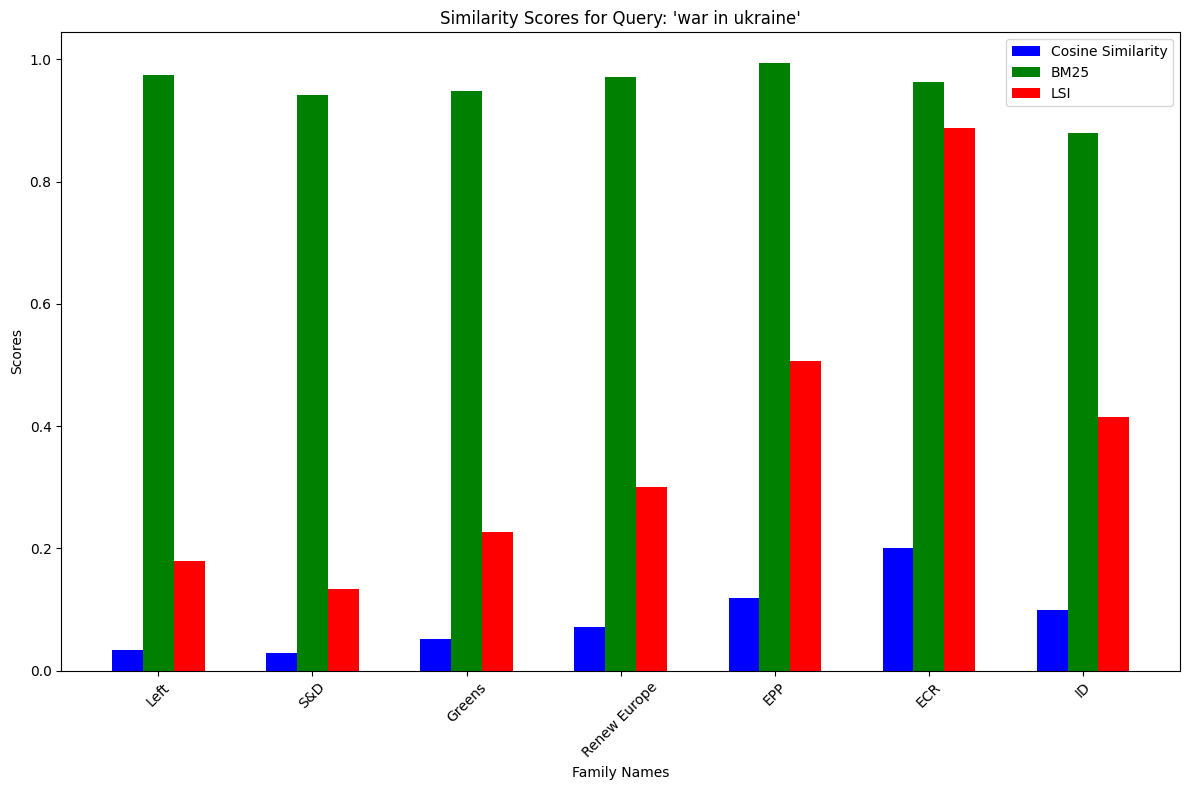


Documents retrieved for query: 'climate change'

Family Name: Left
Cosine Score: 0.02613784731821462
BM25 Score: 0.9527141948058215
LSI Score: 0.15436534583568573
--------------------------------------------------------------------------------
Family Name: S&D
Cosine Score: 0.04499009119343329
BM25 Score: 0.9618230543143844
LSI Score: 0.22365760803222656
--------------------------------------------------------------------------------
Family Name: Greens
Cosine Score: 0.16306230850286005
BM25 Score: 0.996702608009848
LSI Score: 0.7868090867996216
--------------------------------------------------------------------------------
Family Name: Renew Europe
Cosine Score: 0.13753120458330698
BM25 Score: 0.997952774700527
LSI Score: 0.635668933391571
--------------------------------------------------------------------------------
Family Name: EPP
Cosine Score: 0.06611878316120919
BM25 Score: 0.9625790002802754
LSI Score: 0.3108689785003662
------------------------------------------------------

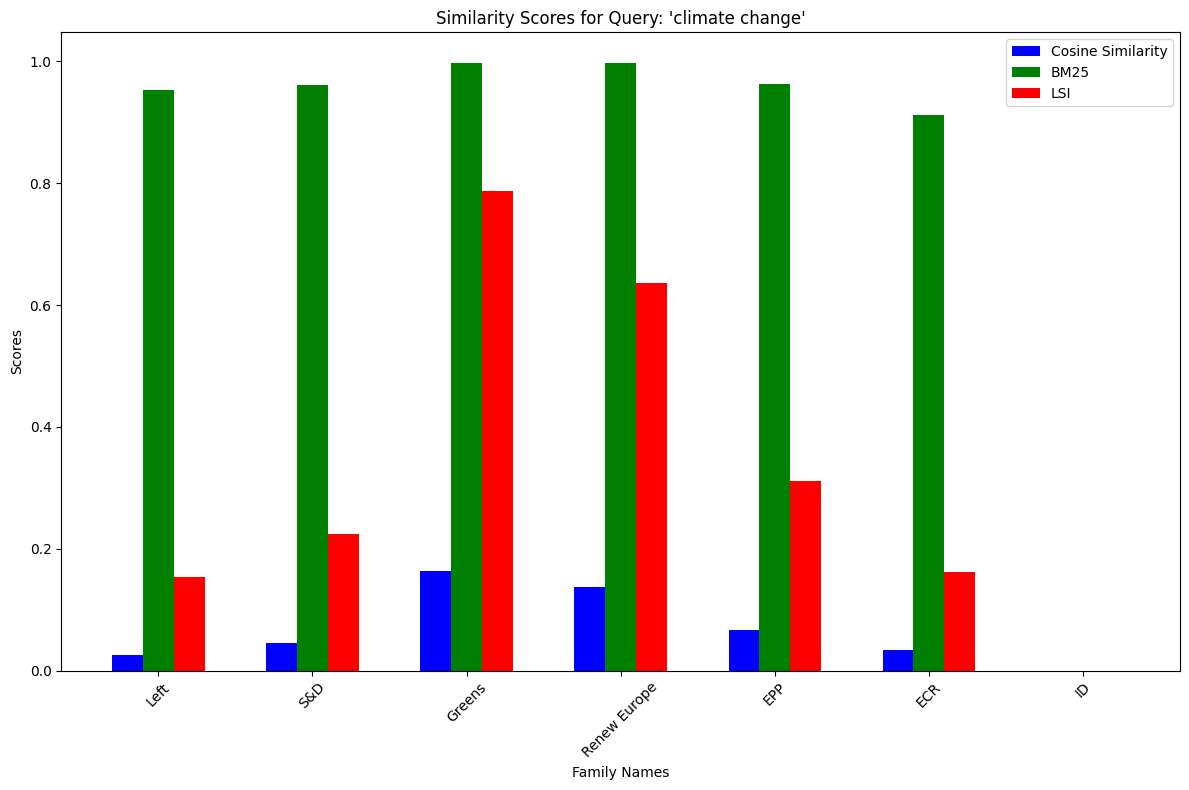

In [35]:
# Function to display results with family names and plot the scores
def display_results(query, results):
    print(f"\nDocuments retrieved for query: '{query}'\n")
    cosine_scores = []
    bm25_scores = []
    lsi_scores = []
    families = []

    for result in results:
        print(f"Family Name: {result['Family']}")
        print(f"Cosine Score: {result['Cosine Score']}")
        print(f"BM25 Score: {result['BM25 Score']}")
        print(f"LSI Score: {result['LSI Score']}")
        print("-" * 80)

        cosine_scores.append(result['Cosine Score'])
        bm25_scores.append(result['BM25 Score'])
        lsi_scores.append(result['LSI Score'])
        families.append(result['Family'])

    # Plotting the results
    x = np.arange(len(families))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.bar(x - width, cosine_scores, width, label='Cosine Similarity', color='b')
    ax.bar(x, bm25_scores, width, label='BM25', color='g')
    ax.bar(x + width, lsi_scores, width, label='LSI', color='r')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Family Names')
    ax.set_ylabel('Scores')
    ax.set_title(f"Similarity Scores for Query: '{query}'")
    ax.set_xticks(x)
    ax.set_xticklabels(families, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example queries
query1 = 'war in ukraine'
query2 = 'climate change'

# Display results
results1 = get_best_match_document(query1)
results2 = get_best_match_document(query2)

display_results(query1, results1)
display_results(query2, results2)

# Sentiment Analysis
Sentiment analysis is the name given to the process of extracting the sentiment from a text (or classifying it into categories such as positive, negative and neutral).
It is possible for the classification to also contain extra information regarding how intense this sentiment is (e.g. not just positive/negative, but very positive, positive, negative, very negative) as well as nuanced emotions.

### Transformers - Pretrained Models
Transformers are a type of deep learning model primarily used in natural language processing tasks. They utilize self-attention mechanisms to process input data and generate context-aware representations, making them highly effective for tasks like text classification, translation, and sentiment analysis.


 In the provided code, we use the transformers library to create an emotion classification pipeline with the j-hartmann/emotion-english-distilroberta-base model. This pipeline analyzes the text from PDF documents to determine the predominant emotion by splitting the text into manageable chunks, classifying the emotion for each chunk, and aggregating the results to find the most dominant emotion in each document.

The model is able to predict 7 different emotions:
* anger 🤬
* disgust 🤢
* fear 😨
* joy 😀
* neutral 😐
* sadness 😭
* surprise 😲

In [36]:
import pandas as pd
from transformers import pipeline, AutoTokenizer

# Emotion classification pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)


# Function to add sentiment to documents
def add_sentiment_to_documents(texts, classifier):
    sentiments = []
    for text in texts:
        chunks = list(split_into_chunks(text))
        chunk_sentiments = []
        for chunk in chunks:
            result = classifier(chunk)
            # Sum the scores of all chunks for each emotion
            for emotion in result[0]:
                if not any(d['label'] == emotion['label'] for d in chunk_sentiments):
                    chunk_sentiments.append(emotion)
                else:
                    for d in chunk_sentiments:
                        if d['label'] == emotion['label']:
                            d['score'] += emotion['score']
                            break

        # Find the emotion with the highest score
        predominant_emotion = max(chunk_sentiments, key=lambda x: x['score'])
        sentiments.append({
            'predominant_emotion': predominant_emotion['label'],
            'predominant_score': predominant_emotion['score'],
            'all_emotions': chunk_sentiments
        })
    return sentiments

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


## Most predominant emotion in each family

We divides a given text into smaller chunks of up to 300 words to ensure that the text fits within the model's input size limit. It does this by splitting the text into words and then grouping these words into segments of the specified maximum length.

The add_sentiment_to_documents function uses this chunking method to process each document, analyze the sentiment of each chunk using the classifier, and aggregate the results to determine the predominant emotion.


In [37]:
import pandas as pd
from transformers import pipeline, AutoTokenizer

# Initialize the tokenizer and classifier
tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

# Function to split text into smaller chunks
def split_into_chunks(text, tokenizer, max_length=200):
    tokens = tokenizer.tokenize(text)
    for i in range(0, len(tokens), max_length):
        yield tokenizer.convert_tokens_to_string(tokens[i:i + max_length])

# Function to add sentiment to documents
def add_sentiment_to_documents(texts, classifier, tokenizer, max_length=200):
    sentiments = []
    for text in texts:
        chunks = list(split_into_chunks(text, tokenizer, max_length))
        chunk_sentiments = []
        for chunk in chunks:
            result = classifier(chunk)
            # Sum the scores of all chunks for each emotion
            for emotion in result[0]:
                if not any(d['label'] == emotion['label'] for d in chunk_sentiments):
                    chunk_sentiments.append({'label': emotion['label'], 'score': emotion['score']})
                else:
                    for d in chunk_sentiments:
                        if d['label'] == emotion['label']:
                            d['score'] += emotion['score']
                            break

        # Find the emotion with the highest score
        predominant_emotion = max(chunk_sentiments, key=lambda x: x['score'])
        sentiments.append({
            'predominant_emotion': predominant_emotion['label'],
            'predominant_score': predominant_emotion['score'],
            'all_emotions': chunk_sentiments
        })
    return sentiments


 The script then prints the most predominant emotion for each document, associating the sentiment with the respective family name.

In [38]:


document_sentiments = add_sentiment_to_documents(texts, classifier, tokenizer)

# Print the most predominant emotion and its score for each document
for i, sentiment in enumerate(document_sentiments):
    print(f"The most predominant emotion in the document from {family_names[i]} is {sentiment['predominant_emotion']} with a score of {sentiment['predominant_score']:.4f}.")
    print("Scores for all emotions:")
    for emotion in sentiment['all_emotions']:
        print(f"  {emotion['label']}: {emotion['score']:.4f}")



Token indices sequence length is longer than the specified maximum sequence length for this model (26307 > 512). Running this sequence through the model will result in indexing errors


The most predominant emotion in the document from Left is joy with a score of 36.2649.
Scores for all emotions:
  anger: 24.2604
  disgust: 0.4902
  fear: 28.8352
  joy: 36.2649
  neutral: 17.1894
  sadness: 11.5669
  surprise: 13.3930
The most predominant emotion in the document from S&D is joy with a score of 44.6956.
Scores for all emotions:
  anger: 20.3540
  disgust: 0.7217
  fear: 21.9453
  joy: 44.6956
  neutral: 30.1889
  sadness: 6.5826
  surprise: 10.5119
The most predominant emotion in the document from Greens is joy with a score of 36.1512.
Scores for all emotions:
  anger: 19.4927
  disgust: 0.2132
  fear: 22.1568
  joy: 36.1512
  neutral: 4.9824
  sadness: 3.0226
  surprise: 0.9812
The most predominant emotion in the document from Renew Europe is joy with a score of 29.7200.
Scores for all emotions:
  anger: 14.0995
  disgust: 0.2274
  fear: 18.4596
  joy: 29.7200
  neutral: 6.0680
  sadness: 2.2331
  surprise: 1.1923
The most predominant emotion in the document from EPP 

# Conclusions

*   Focus on capitalist economy was preferred
* Climate action isn’t the priority of most voters
*  There exists a consensus on helping Ukraine
*   In total, joy was a better stimulant than fear
*   A more complex analysis on health leads to more trust from people
* Euroscepticism is on the rise






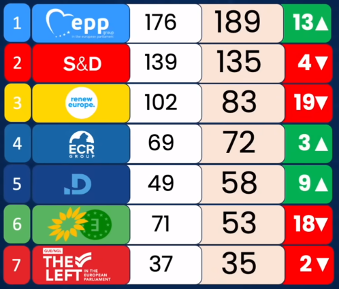

